In [121]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import mainframe as mf
from mainframe import Region

# Define the symbolic variables
x, x_prime = sp.symbols('x x_prime')

# Constants
Q = 5  # n/cm^3 s (source strength)
v = 2200  # cm/s all neutrons are thermal
P = 10  # slab limit
D = 0.7  # Diffusion coefficient
Sigma_a = 0.1  # Absorption cross-section
L = sp.sqrt(D / Sigma_a)  # Diffusion length
lambda_ = sp.sqrt(D / Sigma_a)  # Diffusion length

Slab = Region(
    Diff=0.7, 
    Abs=0.1, 
    Fiss=0, 
    Nu=0, 
    Pos1=0, 
    Pos2=P, 
    composition='r', 
    power=Q # We assumed the same power density as in the exercise 1
)

In [122]:
C_1 = sp.symbols('C_1')
C_2 = sp.symbols('C_2')
phi = sp.Function('phi')(x)
known_sol = sp.Eq(phi, C_1 * sp.sinh(x / lambda_) + C_2 * sp.cosh(-x / lambda_) + L**2 * Q / D)
display(known_sol)

Eq(phi(x), C_1*sinh(0.377964473009227*x) + C_2*cosh(0.377964473009227*x) + 50.0)

In [123]:
# Vacuum boundary condition
phi_vacuum = known_sol.subs(x, 0)
vacuum = sp.Eq(phi_vacuum.rhs,0,evaluate=False)
vacuum = sp.Eq(vacuum.lhs.as_ordered_terms()[0], -vacuum.lhs.as_ordered_terms()[1])
display(vacuum)

Eq(C_2, -50.0)

In [124]:
source = sp.Eq(sp.Integral(known_sol.rhs, (x, 0, P)).doit(), Q * P)
display(source)

Eq(55.3270370193767*C_1 + 57.9123837085485*C_2 + 500.0, 50)

In [125]:
source = source.subs(C_2, vacuum.rhs)
C_1_sol = sp.solve(source, C_1)[0]
display(C_1_sol)

44.2029668888813

In [126]:
# Subs C_1 and C_2 back into the known solution
phi = known_sol.subs(C_1, C_1_sol).subs(C_2, vacuum.rhs)
display(phi)

Eq(phi(x), 44.2029668888813*sinh(0.377964473009227*x) - 50.0*cosh(0.377964473009227*x) + 50.0)

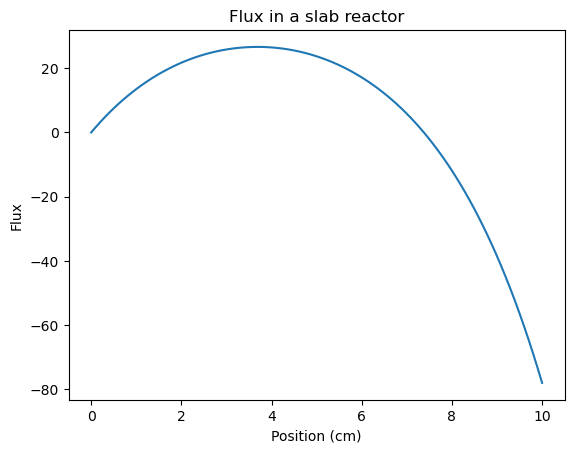

In [127]:
# Plot the flux
x_vals = np.linspace(0, P, 100)
phi_vals = [phi.rhs.subs(x, val) for val in x_vals]
plt.plot(x_vals, phi_vals)
plt.xlabel('Position (cm)')
plt.ylabel('Flux')
plt.title('Flux in a slab reactor')
plt.show()


In [128]:
# Define the Green's function G(x, x')
# G = (1 / (2 * D)) * (sp.exp(-abs(x - x_prime) / lambda_) - sp.exp(-(x + x_prime) / lambda_)) #first option, didn't work
# G = (1 / lambda_) * sp.sinh(sp.Min(x, x_prime) / lambda_) * sp.exp(-sp.Max(x, x_prime) / lambda_) # second option, makes more sense
G = L / (2*D) * sp.exp(-abs(x - x_prime) / lambda_)
display(G)

1.88982236504614*exp(-0.377964473009227*Abs(x - x_prime))

In [129]:
# Define the flux phi(x) as the integral of the Green function over the source region
phi_x = sp.integrate(Q * G, (x_prime, 0, P)).doit()
display(phi_x)

24.4292299729739*exp(0.377964473009227*x)

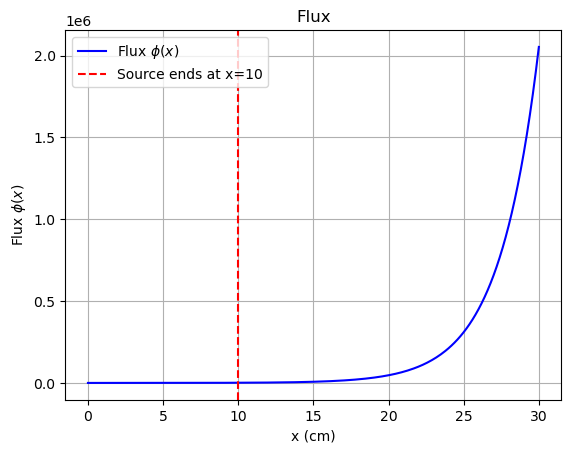

In [130]:
# Generate data for plotting
x_values = np.linspace(0, 30, 300)  # Range to plot
phi_values = [phi_x.subs(x, val).evalf() for val in x_values]

# Plotting the flux
plt.plot(x_values, phi_values, label=r'Flux $\phi(x)$', color='blue')
plt.axvline(x=P, color='red', linestyle='--', label=f'Source ends at x={P}')
plt.xlabel('x (cm)')
plt.ylabel(r'Flux $\phi(x)$')
plt.title('Flux')
plt.grid(True)
plt.legend()
plt.show()